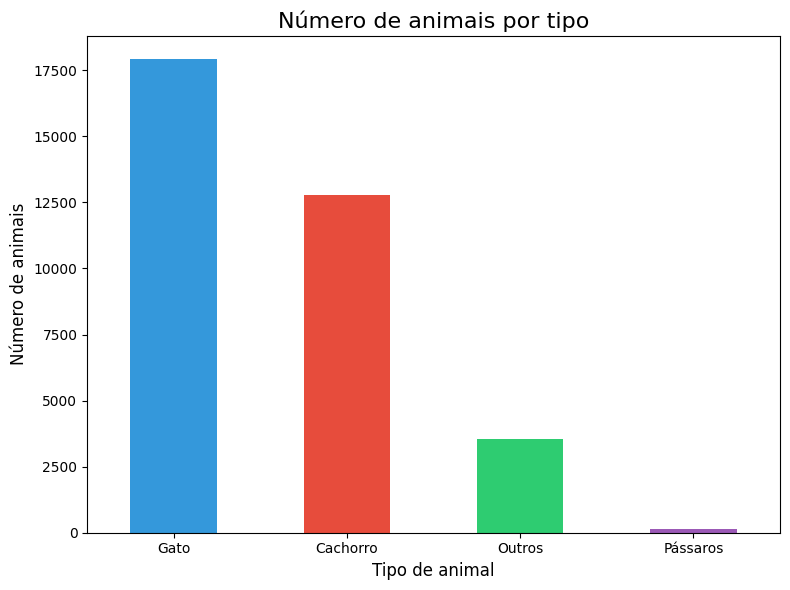

In [2]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o dataset
dataset_path = '../data/data_cleaned.parquet'

# Carregando os dados
data = pd.read_parquet(dataset_path)

# Mapeamento dos tipos de animais
animal_type_mapping = {
    'Cat': 'Gato',
    'Dog': 'Cachorro',
    'Oth': 'Outros',
    'Bir': 'Pássaros'
}

# Aplicar o mapeamento à coluna 'animal_type'
data['animal_type_translated'] = data['animal_type'].map(animal_type_mapping)

# Contar o número de animais por tipo traduzido
animal_type_counts_translated = data['animal_type_translated'].value_counts()

# Plotar o gráfico de barras com os rótulos traduzidos
plt.figure(figsize=(8,6))
animal_type_counts_translated.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])
plt.title('Número de animais por tipo', fontsize=16)
plt.xlabel('Tipo de animal', fontsize=12)
plt.ylabel('Número de animais', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Exibir o gráfico
plt.show()


<Figure size 1000x700 with 0 Axes>

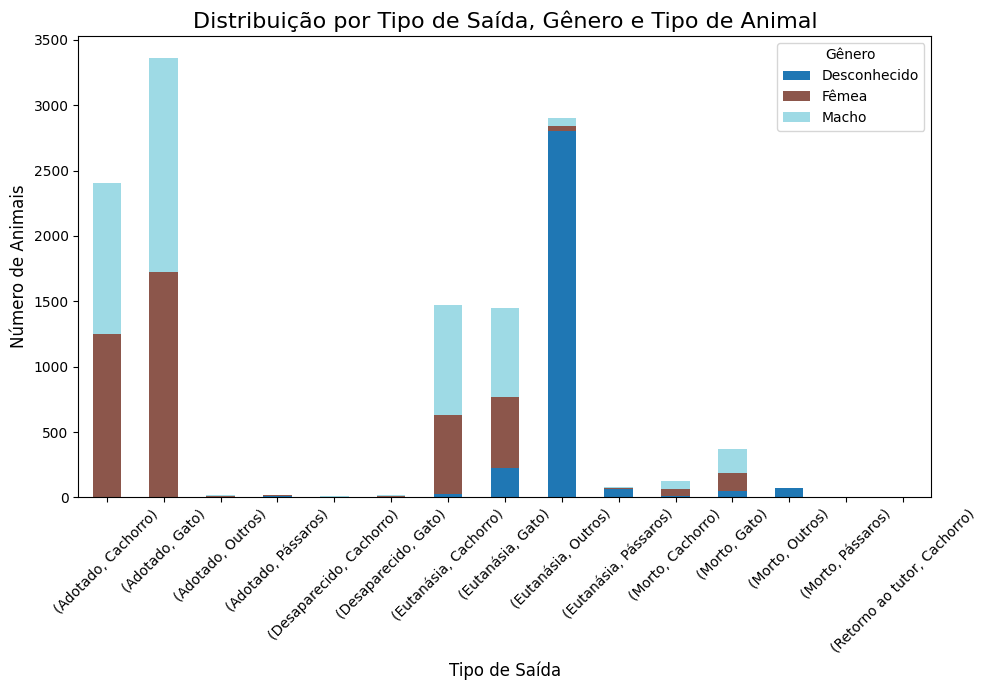

In [5]:
# Mapeamento dos tipos de saída
outcome_type_mapping = {
    'Adoption       ': 'Adotado',
    'Died           ': 'Morto',
    'Euthanasia     ': 'Eutanásia',
    'Missing        ': 'Desaparecido',
    'Return to Owner': 'Retorno ao tutor'
}

# Mapeamento dos tipos de animais
animal_type_mapping = {
    'Cat': 'Gato',
    'Dog': 'Cachorro',
    'Oth': 'Outros',
    'Bir': 'Pássaros'
}

# Aplicar o mapeamento à coluna 'outcome_type' e 'animal_type'
data['outcome_type_translated'] = data['outcome_type'].map(outcome_type_mapping)
data['animal_type_translated'] = data['animal_type'].map(animal_type_mapping)

# Mapeamento para o gênero
data['gender_translated'] = data['sex_upon_outcome'].apply(lambda x: 'Fêmea' if 'female' in str(x).lower() else ('Macho' if 'male' in str(x).lower() else 'Desconhecido'))

# Criar uma tabela de contagem para o gráfico de barras empilhadas
stacked_data = data.groupby(['outcome_type_translated', 'animal_type_translated', 'gender_translated']).size().unstack()

# Plotar o gráfico de barras empilhadas
plt.figure(figsize=(10, 7))
stacked_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 7))

plt.title('Distribuição por Tipo de Saída, Gênero e Tipo de Animal', fontsize=16)
plt.xlabel('Tipo de Saída', fontsize=12)
plt.ylabel('Número de Animais', fontsize=12)
plt.legend(title='Gênero')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_17740\1285474891.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome_type_translated', y='age_upon_outcome_(years)', data=data, palette='Set3')


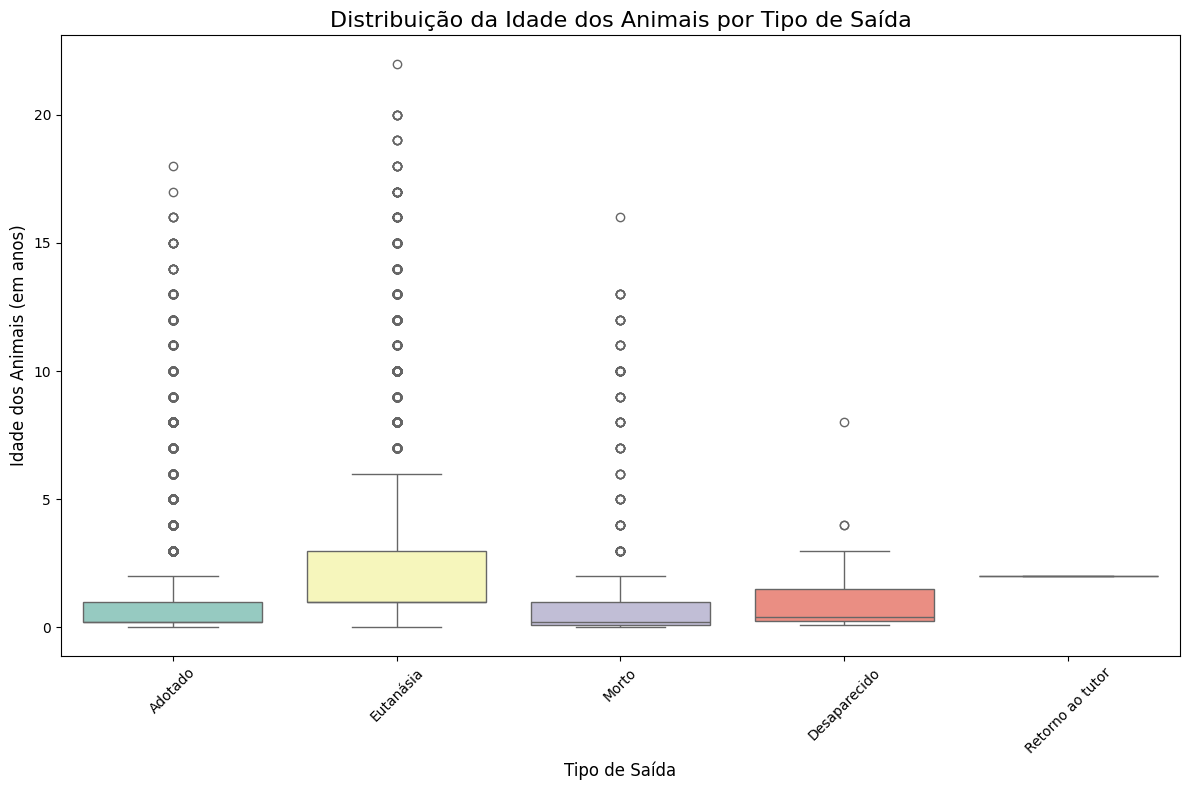

In [8]:
# Importando bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeamento dos tipos de saída para exibir em português
outcome_type_mapping = {
    'Adoption       ': 'Adotado',
    'Died           ': 'Morto',
    'Euthanasia     ': 'Eutanásia',
    'Missing        ': 'Desaparecido',
    'Return to Owner': 'Retorno ao tutor'
}

# Aplicar o mapeamento à coluna 'outcome_type'
data['outcome_type_translated'] = data['outcome_type'].map(outcome_type_mapping)

# Criar um gráfico de violino ou boxplot para visualizar a distribuição da idade por tipo de saída
plt.figure(figsize=(12, 8))
sns.boxplot(x='outcome_type_translated', y='age_upon_outcome_(years)', data=data, palette='Set3')

# Adicionar títulos e rótulos aos eixos
plt.title('Distribuição da Idade dos Animais por Tipo de Saída', fontsize=16)
plt.xlabel('Tipo de Saída', fontsize=12)
plt.ylabel('Idade dos Animais (em anos)', fontsize=12)

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


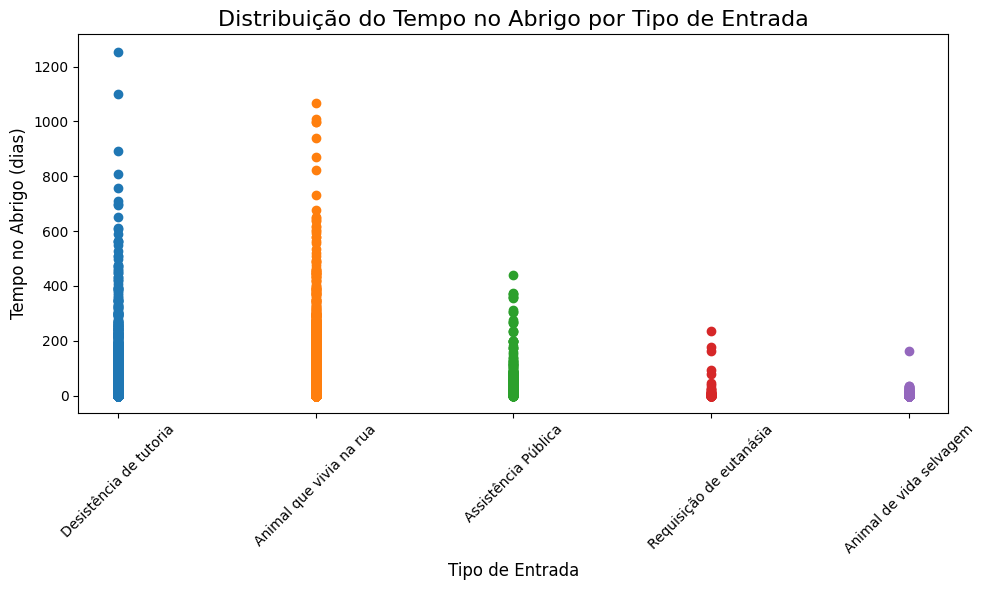

In [16]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o dataset
dataset_path = '../data/data_cleaned.parquet'

# Carregando os dados
data = pd.read_parquet(dataset_path)

# Mapeamento dos tipos de entrada para exibir em português
intake_type_mapping = {
    'Euthanasia Request': 'Requisição de eutanásia',
    'Owner Surrender   ': 'Desistência de tutoria',
    'Public Assist     ': 'Assistência Pública',
    'Stray             ': 'Animal que vivia na rua',
    'Wildlife          ': 'Animal de vida selvagem'
}

# Aplicar o mapeamento à coluna 'intake_type'
data['intake_type_translated'] = data['intake_type'].map(intake_type_mapping)

# Plotar o gráfico de dispersão (scatter plot)
plt.figure(figsize=(10, 6))
for intake_type in data['intake_type_translated'].unique():
    subset = data[data['intake_type_translated'] == intake_type]
    plt.scatter(subset['intake_type_translated'], subset['time_in_shelter_days'])

# Títulos e rótulos dos eixos
plt.title('Distribuição do Tempo no Abrigo por Tipo de Entrada', fontsize=16)
plt.xlabel('Tipo de Entrada', fontsize=12)
plt.ylabel('Tempo no Abrigo (dias)', fontsize=12)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()
